In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time 
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

In [55]:
## 카카오 맵 
driver = webdriver.Chrome()
driver.get('https://map.kakao.com/')

In [56]:
searchbox = driver.find_element(By.ID, 'search.keyword.query')
searchbox.send_keys('홍대 맛집'+ Keys.ENTER)

In [57]:
## 상세보기 주소 가져오기 
list_url = []
moreview_element = driver.find_elements(By.CSS_SELECTOR, 'a[data-id="moreview"]')
for i in range(len(moreview_element)):
    list_url.append(moreview_element[i].get_attribute('href'))

driver.close()

In [96]:
list_url

['https://place.map.kakao.com/26235884',
 'https://place.map.kakao.com/53292857',
 'https://place.map.kakao.com/12771116',
 'https://place.map.kakao.com/400281849',
 'https://place.map.kakao.com/892514586',
 'https://place.map.kakao.com/2057792795',
 'https://place.map.kakao.com/19032013',
 'https://place.map.kakao.com/18257217',
 'https://place.map.kakao.com/1985225055',
 'https://place.map.kakao.com/27272711',
 'https://place.map.kakao.com/895272833',
 'https://place.map.kakao.com/10368349',
 'https://place.map.kakao.com/8123221',
 'https://place.map.kakao.com/21410206',
 'https://place.map.kakao.com/268235810']

In [109]:
data = {
    'name' : [],
    'category' : [],
    'star' : [],
    'address' : [],
    'oper_time' : [],
    'starCount' : [],
    'reviewCount' : []
}


In [110]:
for i in range(len(list_url)):
    ## 상세보기 웹페이지 열기
    driver = webdriver.Chrome()
    driver.get(list_url[i])
    driver.implicitly_wait(3)

    # 영업시간 더 보기 클릭
    try:
        oper_more = driver.find_elements(By.CSS_SELECTOR, 'a[data-logevent = "main_info,more_timeinfo"]')
        oper_more[0].clcik()
        time.sleep(2)

         ## 상세page bs4 파싱 분석
        soup = bs(driver.page_source, 'html.parser')

    # 영업시간 더보기가 없는 경우
    except:
        ## 상세page bs4 파싱 분석
        soup = bs(driver.page_source, 'html.parser')

    # 웹페이지 닫기
    driver.close()
    
    # 매장명
    data['name'].append(soup.find('h2', {'class':'tit_location'}).get_text())
    # 분류
    data['category'].append(soup.find('span',{'class':'txt_location'}).get_text().split(':')[1].strip())
    # 주소
    data['address'].append(soup.find('span', {'class': 'txt_address'}).get_text().replace(" ", "").replace("\n", " "))

    # 별점 없는 경우 구분 (별점, 리뷰 수)
    if len(soup.find_all('span',{'class':'color_b'})) > 1:
        data['star'].append(soup.find_all('span', {'class':'color_b'})[0].get_text().strip('점'))
        data['starCount'].append(soup.find('a', {'class': 'link_evaluation'})['data-cnt'])
        data['reviewCount'].append(soup.find_all('span', {'class':'color_b'})[1].get_text().strip('개'))
    else:
        data['star'].append('0')
        data['starCount'].append('0')
        data['reviewCount'].append(soup.find('span', {'class':'color_b'}).get_text().strip('개'))

    # 영업시간 더보기 없는 경우 구분
    if oper_more:    
        data['oper_time'].append(soup.find_all('ul', {'class':'list_operation'})[1].get_text().strip())
    else:
        data['oper_time'].append(soup.find('ul', {'class':'list_operation'}).get_text().strip().replace("\n", ""))

    print(f"{i+1}번째 데이터 입력 완료")


1번째 데이터 입력 완료
2번째 데이터 입력 완료
3번째 데이터 입력 완료
4번째 데이터 입력 완료
5번째 데이터 입력 완료
6번째 데이터 입력 완료
7번째 데이터 입력 완료
8번째 데이터 입력 완료
9번째 데이터 입력 완료
10번째 데이터 입력 완료
11번째 데이터 입력 완료
12번째 데이터 입력 완료
13번째 데이터 입력 완료
14번째 데이터 입력 완료
15번째 데이터 입력 완료


In [111]:
df = pd.DataFrame(data)

In [112]:
df

,name,category,star,address,oper_time,starCount,reviewCount
0,피오니 홍대점,카페,3.8,서울마포구 독막로7길51 1층(우)04043,매일 12:00 ~ 21:00\n\n매일 라스트오더 ~ 20:30,274,642
1,943킹스크로스,테마카페,4.1,"서울마포구 양화로16길24 지하1층,1~4층(우)04039",월~목 11:30 ~ 21:30\n\n금~일 10:00 ~ 21:30,360,191
2,카미야,"돈까스,우동",4.2,서울마포구 와우산로21길28-6 지하1층(우)04040,매일 11:00 ~ 21:30\n\n매일 라스트오더 ~ 21:00,191,424
3,우와 홍대본점,일식,3.4,서울마포구 와우산로21길21-16 2층202호(우)04041,매일 12:00 ~ 22:00월~금 휴게시간 14:30 ~ 17:00,168,622
4,감성타코 홍대점,"멕시칸,브라질",3.5,서울마포구 와우산로21길20-11 2층(우)04040,"월~금 11:30 ~ 22:00\n\n토,일 12:00 ~ 22:00\n\n월~금 ...",134,804
5,칸다소바 홍대점,일본식라면,4.3,서울마포구 와우산로51-6 1층(우)04049,매일 10:30 ~ 21:30\n\n월~토 휴게시간 16:00 ~ 17:00\n\n...,277,439
6,맛이차이나,중국요리,3.6,서울마포구 독막로68 2층(우)04074,매일 11:30 ~ 22:00월~금 휴게시간 16:00 ~ 17:00,149,178
7,강강술래 홍대점,한식,3.8,"서울마포구 잔다리로6길25 1,2층(우)04039",매일 11:00 ~ 22:00,23,30
8,홍대 조선시대,한식,4.7,서울마포구 홍익로3길44 지하1층(우)04039,"월,화,수,목,일 17:30 ~ 03:00\n\n금,토 17:30 ~ 04:00",498,118
9,비스트로주라,양식,4.4,서울마포구 와우산로23길18-7 1층(우)04054,매일 11:30 ~ 21:00월~금 휴게시간 15:10 ~ 17:00,194,120


In [74]:
data['oper_time']

['매일 12:00 ~ 21:00\n\n매일 라스트오더 ~ 20:30',
 '월~목 11:30 ~ 21:30\n\n금~일 10:00 ~ 21:30',
 '매일 11:00 ~ 21:30\n\n매일 라스트오더 ~ 21:00',
 'app.catchtable.co.kr/ct/shop/woowaa_hongdae',
 '월~금 11:30 ~ 22:00\n\n토,일 12:00 ~ 22:00\n\n월~금 휴게시간 16:00 ~ 17:00',
 '매일 10:30 ~ 21:30\n\n월~토 휴게시간 16:00 ~ 17:00\n\n일 휴게시간 15:30 ~ 17:00']

In [26]:
len(data['oper_time'])

15

In [27]:
data['oper_time']

['매일 12:00 ~ 21:00\n\n매일 라스트오더 ~ 20:30',
 '월~목 11:30 ~ 21:30\n\n금~일 10:00 ~ 21:30',
 '매일 11:00 ~ 21:30\n\n매일 라스트오더 ~ 21:00',
 '매일 12:00 ~ 22:00월~금 휴게시간 14:30 ~ 17:00',
 '월~금 11:30 ~ 22:00\n\n토,일 12:00 ~ 22:00\n\n월~금 휴게시간 16:00 ~ 17:00',
 '매일 10:30 ~ 21:30\n\n월~토 휴게시간 16:00 ~ 17:00\n\n일 휴게시간 15:30 ~ 17:00',
 '매일 11:30 ~ 22:00월~금 휴게시간 16:00 ~ 17:00',
 '매일 11:00 ~ 22:00',
 '월,화,수,목,일 17:30 ~ 03:00\n\n금,토 17:30 ~ 04:00',
 '매일 11:30 ~ 21:00월~금 휴게시간 15:10 ~ 17:00',
 '화~일 11:30 ~ 20:00\n\n화~금 휴게시간 15:00 ~ 16:00',
 '매일 12:00 ~ 21:00',
 '매일 11:00 ~ 23:00\n\n매일 라스트오더 ~ 22:00',
 '매일 11:30 ~ 03:00',
 '매일 11:30 ~ 21:30']

In [22]:
data['star']

['3.8',
 '4.1',
 '4.2',
 '3.4',
 '3.5',
 '4.3',
 '3.6',
 '3.8',
 '4.7',
 '4.4',
 '271개',
 '0',
 '4.2',
 '3.9',
 '3.0',
 '4.5']

In [2]:
driver = webdriver.Chrome()
driver.get('https://place.map.kakao.com/19032013')

In [81]:
# 영업시간 더 보기 클릭
try:
    oper_more = driver.find_element(By.CSS_SELECTOR, 'a[data-logevent = "main_info,more_timeinfo"]')
    oper_more.clcik()
    time.sleep(2)
         ## 상세page bs4 파싱 분석
    soup = bs(driver.page_source, 'html.parser')
# 영업시간 더보기가 없는 경우
except:
    ## 상세page bs4 파싱 분석
    soup = bs(driver.page_source, 'html.parser')

In [91]:
soup.find('span', {'class': 'txt_address'}).get_text().replace(" ", "").replace("\n", " ")

'서울마포구 독막로68 2층(우)04074'

In [94]:
test = pd.read_csv('./data.csv')

In [95]:
test

,name,category,star,address,oper_time,reviewCount
0,피오니 홍대점,카페,3.8,서울마포구 독막로7길51 1층(우)04043,매일 12:00 ~ 21:00\n\n매일 라스트오더 ~ 20:30,642
1,943킹스크로스,테마카페,4.1,"서울마포구 양화로16길24 지하1층,1~4층(우)04039",월~목 11:30 ~ 21:30\n\n금~일 10:00 ~ 21:30,191
2,카미야,"돈까스,우동",4.2,서울마포구 와우산로21길28-6 지하1층(우)04040,매일 11:00 ~ 21:30\n\n매일 라스트오더 ~ 21:00,424
3,우와 홍대본점,일식,3.4,서울마포구 와우산로21길21-16 2층202호(우)04041,매일 12:00 ~ 22:00월~금 휴게시간 14:30 ~ 17:00,622
4,감성타코 홍대점,"멕시칸,브라질",3.5,서울마포구 와우산로21길20-11 2층(우)04040,"월~금 11:30 ~ 22:00\n\n토,일 12:00 ~ 22:00\n\n월~금 ...",804
5,칸다소바 홍대점,일본식라면,4.3,서울마포구 와우산로51-6 1층(우)04049,매일 10:30 ~ 21:30\n\n월~토 휴게시간 16:00 ~ 17:00\n\n...,439
6,맛이차이나,중국요리,3.6,서울마포구 독막로68 2층(우)04074,매일 11:30 ~ 22:00월~금 휴게시간 16:00 ~ 17:00,178
7,강강술래 홍대점,한식,3.8,"서울마포구 잔다리로6길25 1,2층(우)04039",매일 11:00 ~ 22:00,30
8,홍대 조선시대,한식,4.7,서울마포구 홍익로3길44 지하1층(우)04039,"월,화,수,목,일 17:30 ~ 03:00\n\n금,토 17:30 ~ 04:00",118
9,비스트로주라,양식,4.4,서울마포구 와우산로23길18-7 1층(우)04054,매일 11:30 ~ 21:00월~금 휴게시간 15:10 ~ 17:00,120


In [ ]:
    # 별점 없는 경우 구분 (별점, 리뷰 수)
if len(soup.find_all('span',{'class':'color_b'})) > 1:
    data['star'].append(soup.find_all('span', {'class':'color_b'})[0].get_text().strip('점'))
    data['starCount'].append(soup.find('span', {'class':'color_g'}).get_text().strip('(').strip(')'))
    data['reviewCount'].append(soup.find_all('span', {'class':'color_b'})[1].get_text().strip('개'))
else:
    data['star'].append('0')
    data['starCount'].append('0')
    data['reviewCount'].append(soup.find('span', {'class':'color_b'}).get_text().strip('개'))

In [107]:
soup.find('span', {'class':'color_g'}).get_text().strip('개 후기').strip('(').strip(')')

'921'

In [108]:
soup.find('a', {'class': 'link_evaluation'})['data-cnt']

'921'

In [138]:
## 카카오 맵 
driver = webdriver.Chrome()
driver.get('https://map.kakao.com/')
time.sleep(2)

## input 창에 검색어 입력
searchbox = driver.find_element(By.ID, 'search.keyword.query')
searchbox.send_keys('홍대 맛집'+ Keys.ENTER)
time.sleep(3)



In [123]:
driver.find_element(By.ID, 'info.search.place.more').click()

In [125]:
driver.find_element(By.ID, f'info.search.page.no{4}').click()

In [141]:
## 상세보기 주소 가져오기 
list_url = []

for inx in range(2,12):
    moreview_element = driver.find_elements(By.CSS_SELECTOR, 'a[data-id="moreview"]')
    for i in range(len(moreview_element)):
        list_url.append(moreview_element[i].get_attribute('href'))
    if inx == 2:
        driver.find_element(By.ID, 'info.search.place.more').click()
        time.sleep(1)
    elif inx in (6,11):
        driver.find_element(By.ID, 'info.search.page.next').click()
        time.sleep(1)  
    else:
        if (inx - 5) <= 0:
            driver.find_element(By.ID, f'info.search.page.no{inx}').click()
            time.sleep(1)
        else:
            driver.find_element(By.ID, f'info.search.page.no{inx-5}').click()
            time.sleep(1)


In [142]:
len(list_url)

150

In [143]:
test = pd.read_csv('./data.csv')

In [144]:
test

,name,category,star,address,oper_time,starCount,reviewCount
0,피오니 홍대점,카페,3.8,서울마포구 독막로7길51 1층(우)04043,매일 12:00 ~ 21:00\n\n매일 라스트오더 ~ 20:30,274,642
1,943킹스크로스,테마카페,4.1,"서울마포구 양화로16길24 지하1층,1~4층(우)04039",월~목 11:30 ~ 21:30\n\n금~일 10:00 ~ 21:30,360,191
2,카미야,"돈까스,우동",4.2,서울마포구 와우산로21길28-6 지하1층(우)04040,매일 11:00 ~ 21:30\n\n매일 라스트오더 ~ 21:00,191,424
3,우와 홍대본점,일식,3.4,서울마포구 와우산로21길21-16 2층202호(우)04041,매일 12:00 ~ 22:00월~금 휴게시간 14:30 ~ 17:00,168,622
4,감성타코 홍대점,"멕시칸,브라질",3.5,서울마포구 와우산로21길20-11 2층(우)04040,"월~금 11:30 ~ 22:00\n\n토,일 12:00 ~ 22:00\n\n월~금 ...",134,804
5,칸다소바 홍대점,일본식라면,4.3,서울마포구 와우산로51-6 1층(우)04049,매일 10:30 ~ 21:30\n\n월~토 휴게시간 16:00 ~ 17:00\n\n...,277,439
6,맛이차이나,중국요리,3.6,서울마포구 독막로68 2층(우)04074,매일 11:30 ~ 22:00월~금 휴게시간 16:00 ~ 17:00,149,178
7,강강술래 홍대점,한식,3.8,"서울마포구 잔다리로6길25 1,2층(우)04039",매일 11:00 ~ 22:00,23,30
8,홍대 조선시대,한식,4.7,서울마포구 홍익로3길44 지하1층(우)04039,"월,화,수,목,일 17:30 ~ 03:00\n\n금,토 17:30 ~ 04:00",498,118
9,비스트로주라,양식,4.4,서울마포구 와우산로23길18-7 1층(우)04054,매일 11:30 ~ 21:00월~금 휴게시간 15:10 ~ 17:00,194,120


In [5]:
import base64
import re

In [3]:
driver = webdriver.Chrome()
driver.get('https://place.map.kakao.com/26235884')

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [4]:
img_element = driver.find_element(By.ID, 'dayChart')



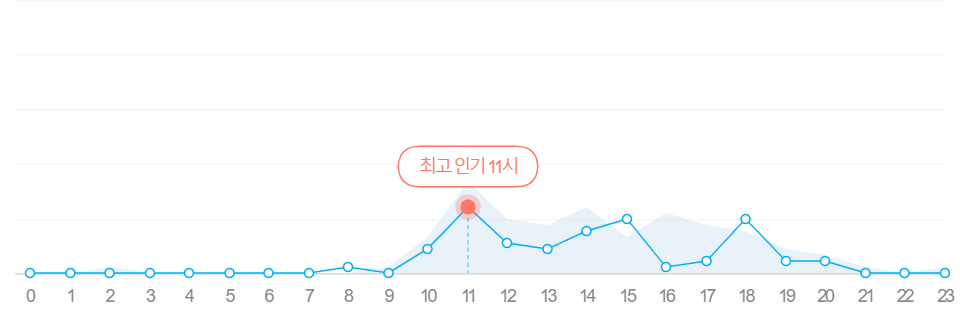

In [5]:
## canvas 파일 스크래핑

WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "ageChart")))
base64_image = driver.execute_script("return document.querySelector('canvas').toDataURL('image/png');")
print(base64_image)

In [12]:
import base64

In [15]:
#### 최종 canvas 이미지 저장

test_image = driver.execute_script("return document.querySelectorAll('canvas')[1].toDataURL();")
image_data = test_image.split(',')[1]

# Base64 디코딩하여 이미지 데이터 추출
image_data_decoded = base64.b64decode(image_data)

# 이미지 데이터를 파일로 저장
with open('test123.png', 'wb') as f:
    f.write(image_data_decoded)

In [18]:
import requests

In [17]:
def image_save(img_path, save_path, file_name):
    html_data = requests.get(img_path)
    imageFile = open(
        os.path.join(
            save_path,
            file_name
        ),
        'wb'
    )
    # 이미지 데이터의 크기
    chunk_size = 100000000
    for chunk in html_data.iter_content(chunk_size):
        imageFile.write(chunk)
        imageFile.close()
    print('파일 저장 완료')

In [2]:
import pandas as pd

In [7]:
a = pd.read_csv('./data2/카미야.csv')

In [8]:
a

,user_name,user_rank,num_response,user_star,time,rating,content
0,김나영,8,24,5.0,2024.04.11.,5.0,NaN
1,내돈내산 솔직리뷰,26,63,3.5,2024.04.09.,3.0,돈까스 맛은 제 동네와 비슷한데 여긴 레몬즙이 있어서 뿌려먹으니 안물리고 맛있었어요...
2,냐옹,18,88,3.8,2024.04.08.,5.0,NaN
3,ㅇㅇ,3,1,2.0,2024.04.08.,2.0,웨이팅하고 오꼬노미야끼동 먹었어요. 맛있게 먹고 있었는데 나이 좀 있으신 여자분 오...
4,마포구 쩝쩝박사,33,89,3.3,2024.04.04.,4.0,엄청 뛰어난 맛은 아닌데 가격이 좋아요 요즘 기본 만오천 넘는데 치즈카츠 만원임
...,...,...,...,...,...,...,...
186,디카페인,31,134,4.1,2019.02.11.,4.0,냉모밀 짱짱 추천. 메뉴 전부 맛있지만 전체적으로 짠 편임.
187,.,10,9,3.3,2019.01.20.,5.0,치즈카츠랑 새우튀김을 정말 좋아하는데 아주 만족스러웠어요 그리고 크로켓을 추가로 주...
188,TBO,3,15,2.5,2018.12.10.,4.0,NaN
189,[CHAN],33,277,3.4,2018.09.25.,3.0,샐러드 5우동. 5히레. 2.5로스. 3.0서비스 굿기름이 별로인듯...


In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time 
import os
import matplotlib.pyplot as plt
import base64
import time

### url 가져오기

## 카카오 맵 
driver = webdriver.Chrome()
driver.get('https://map.kakao.com/')
time.sleep(2)

## input 창에 검색어 입력
searchbox = driver.find_element(By.ID, 'search.keyword.query')
searchbox.send_keys('홍대 맛집'+ Keys.ENTER)
time.sleep(3)

## 상세보기 주소 가져오기 
list_url = []

## 아래 1,2,3,4,5 리스트 번호 다 뜨도록
# 장소 더보기 클릭
driver.find_element(By.ID, 'info.search.place.more').click()
time.sleep(2)
# 1번리스트로 돌아오기
driver.find_element(By.ID, 'info.search.page.no1').click()
time.sleep(2)

for count in range(1):
    
    for inx in range(2, 6):
        
        # 현재 리스트의 상세보기 주소 스크래핑
        moreview_element = driver.find_elements(By.CSS_SELECTOR, 'a[data-id="moreview"]')
        for i in range(len(moreview_element)):
            list_url.append(moreview_element[i].get_attribute('href'))
        # 다음 리스트 클릭
        driver.find_element(By.ID, f'info.search.page.no{inx}').click()
        # 5번 리스트 저장
        if inx == 5:
            moreview_element = driver.find_elements(By.CSS_SELECTOR, 'a[data-id="moreview"]')
            for i in range(len(moreview_element)):
                list_url.append(moreview_element[i].get_attribute('href'))
        time.sleep(2)
    # 다음 리스트 페이지 넘어가기
    driver.find_element(By.ID ,'info.search.page.next').click()
    time.sleep(2)



## 웹페이지 종료
driver.close()

In [4]:
len(list_url)

75

In [ ]:

## 정보 넣을 빈 딕셔너리
data = {
    'merchant' : [],
    'category' : [],
    'star' : [],
    'address' : [],
    'oper_time' : [],
    'starCount' : [],
    'reviewCount' : []
}
data2 = {
    'user_name' : [],
    'user_rank' : [],
    'num_response' : [],
    'user_star' : [], 
    'time' : [],
    'rating' : [],
    'content' : []
}

### 기본 정보 크롤링 (상세보기 get으로 열어서 가져오기)
driver = webdriver.Chrome()
for i in range(len(list_url)):
    ## 상세보기 웹페이지 열기
    driver.get(list_url[i])
    driver.implicitly_wait(3)

    # 영업시간 더 보기 클릭
    try:
        oper_more = driver.find_elements(By.CSS_SELECTOR, 'a[data-logevent = "main_info,more_timeinfo"]')
        oper_more[0].click()
        time.sleep(2)  

    # 영업시간 더보기가 없는 경우
    except:
        pass

    # 후기 더보기 클릭
    try:
        link_more = driver.find_element(By.CLASS_NAME, 'txt_more')
        while link_more.text == "후기 더보기":
            link_more = driver.find_element(By.CLASS_NAME, 'txt_more')
            # 마지막 후기 더보기까지 눌렀으면 멈추기
            if link_more.text != "후기 접기":
                link_more.click()
                time.sleep(0.3)
    # 후기 더보기 없는 경우        
    except:
        pass
    time.sleep(0.1)

    ############################################################################
    

    ## 상세page bs4 파싱 분석
    soup = bs(driver.page_source, 'html.parser')

    ##canvas 이미지 저장

    test_image = driver.execute_script("return document.querySelectorAll('canvas')[1].toDataURL();")
    image_data = test_image.split(',')[1]

    ## Base64 디코딩하여 이미지 데이터 추출
    image_data_decoded = base64.b64decode(image_data)

    test_image2 = driver.execute_script("return document.querySelectorAll('canvas')[2].toDataURL();")
    image_data2 = test_image2.split(',')[1]

    ## Base64 디코딩하여 이미지 데이터 추출
    image_data_decoded2 = base64.b64decode(image_data2)

    
    #############################################################


    ## 매장명
    mer = soup.find('h2', {'class':'tit_location'}).get_text()
    data['merchant'].append(mer)
    ## 분류
    data['category'].append(soup.find('span',{'class':'txt_location'}).get_text().split(':')[1].strip())
    ## 주소
    data['address'].append(soup.find('span', {'class': 'txt_address'}).get_text().replace(" ", "").replace("\n", " "))

    ## 별점, 리뷰 수 
    # 별점 있는 경우
    if len(soup.find_all('span',{'class':'color_b'})) > 1:
        data['star'].append(soup.find_all('span', {'class':'color_b'})[0].get_text().strip('점'))
        data['starCount'].append(soup.find('a', {'class': 'link_evaluation'})['data-cnt'])
        data['reviewCount'].append(soup.find_all('span', {'class':'color_b'})[1].get_text().strip('개'))
    # 별점 없는 경우
    else:
        data['star'].append('0')
        data['starCount'].append('0')
        data['reviewCount'].append(soup.find('span', {'class':'color_b'}).get_text().strip('개'))

    ## 영업시간
    # 더보기 있는 경우
    if oper_more:    
        data['oper_time'].append(soup.find_all('ul', {'class':'list_operation'})[1].get_text().strip())
    # 더보기 없는 경우
    else:
        data['oper_time'].append(soup.find('ul', {'class':'list_operation'}).get_text().strip().replace("\n", ""))




############################################################################
        

   


    # 리뷰 목록 잡기
    reveiw_listed = soup.find_all('li', {'data-ismy':'false'})

    #### df2 만들기 (리뷰df)
    for j in range(len(reveiw_listed)):
        
        
        ## 유저 이름
        start_time = time.time()
        data2['user_name'].append(soup.find_all('span',{'class':'txt_username'})[j].get_text())
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"유저 이름 소요된 시간: {elapsed_time} 초")

        ## 유저 레벨
        start_time = time.time()
        data2['user_rank'].append(soup.find_all('span', {'class' : 'txt_badge'})[j].get_text().strip('레벨'))
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"유저 레벨 소요된 시간: {elapsed_time} 초")

        ## 유저 후기수
        start_time = time.time()
        data2['num_response'].append(
            soup.find_all('div',{'class':'unit_info'})[j].find_all('span',{'class':'txt_desc'})[0].get_text()
        )
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"유저 후기수 소요된 시간: {elapsed_time} 초")

        ## 유저 별점 평균
        start_time = time.time()
        data2['user_star'].append(
            soup.find_all('div',{'class':'unit_info'})[j].find_all('span',{'class':'txt_desc'})[1].get_text()
        )
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"유저 별점 평균 소요된 시간: {elapsed_time} 초")

        
        ### 리뷰 작성 시간
        start_time = time.time()
        data2['time'].append(
            soup.find_all('div',{'class':'unit_info'})[j].find('span',{'class':'time_write'}).get_text()
        )
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"리뷰 작성 시간 소요된 시간: {elapsed_time} 초")

        ## 리뷰 내용
        start_time = time.time()
        data2['content'].append(
            soup.find_all('p', {'class':'txt_comment'})[j].get_text().strip('더보기')
        )
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"리뷰 내용 소요된 시간: {elapsed_time} 초")

        ## 유저가 평가한 별점 
        start_time = time.time()
        # 너비를 추출하여 별점 계산 (너비는 별점의 백분율을 나타냄)
        style_attribute = soup.find_all('div', {'class':'star_info'})[j].find('span',{'class':'ico_star inner_star'})['style']
        width_percent = float(style_attribute.split(':')[1].strip('%;'))
        rating_out_of_five = width_percent / 20  # 별점은 100%를 5로 나눈 값
        data2['rating'].append(rating_out_of_five)

        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"유저가 평가한 별점 소요된 시간: {elapsed_time} 초")



    ################################################################
    
   

    ## 데이터 프레임으로 만들기
    df2 = pd.DataFrame(data2)
    df2.to_csv(f'./data2/{mer}.csv',index = False)

    
    # 이미지 데이터를 파일로 저장
    with open(f'./image/{mer}1.png', 'wb') as f:
        f.write(image_data_decoded)

    with open(f'./image/{mer}2.png', 'wb') as f:
        f.write(image_data_decoded2)


    

    print(f"{i+1}번째 데이터 입력 완료, {mer}.csv 저장 완료")



driver.close()


df = pd.DataFrame(data)
df.to_csv("./data1/data.csv", index=False)



In [4]:
### 땡스네이쳐 확인
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time 
import os
import matplotlib.pyplot as plt
import base64


## 정보 넣을 빈 딕셔너리
data = {
    'merchant' : [],
    'category' : [],
    'star' : [],
    'address' : [],
    'oper_time' : [],
    'starCount' : [],
    'reviewCount' : []
}
data2 = {
    'user_name' : [],
    'user_rank' : [],
    'num_response' : [],
    'user_star' : [], 
    'time' : [],
    'rating' : [],
    'content' : []
}

### 기본 정보 크롤링 (상세보기 get으로 열어서 가져오기)
driver = webdriver.Chrome()

driver.get('https://place.map.kakao.com/10368349')
driver.implicitly_wait(3)

# 영업시간 더 보기 클릭
try:
    oper_more = driver.find_elements(By.CSS_SELECTOR, 'a[data-logevent = "main_info,more_timeinfo"]')
    oper_more[0].click()
    time.sleep(2)  

# 영업시간 더보기가 없는 경우
except:
    pass

# 후기 더보기 클릭
try:
    link_more = driver.find_element(By.CLASS_NAME, 'txt_more')
    while link_more.text == "후기 더보기":
        link_more = driver.find_element(By.CLASS_NAME, 'txt_more')
        # 마지막 후기 더보기까지 눌렀으면 멈추기
        if link_more.text != "후기 접기":
            link_more.click()
            time.sleep(0.3)
# 후기 더보기 없는 경우        
except:
    pass
time.sleep(0.1)

## 상세page bs4 파싱 분석
soup = bs(driver.page_source, 'html.parser')


##canvas 이미지 저장
try:
    test_image = driver.execute_script("return document.querySelectorAll('canvas')[1].toDataURL();")
    image_data = test_image.split(',')[1]

    ## Base64 디코딩하여 이미지 데이터 추출
    image_data_decoded = base64.b64decode(image_data)

    test_image2 = driver.execute_script("return document.querySelectorAll('canvas')[2].toDataURL();")
    image_data2 = test_image2.split(',')[1]

    ## Base64 디코딩하여 이미지 데이터 추출
    image_data_decoded2 = base64.b64decode(image_data2)
except:
    pass
    



## 매장명
mer = soup.find('h2', {'class':'tit_location'}).get_text()
data['merchant'].append(mer)
## 분류
data['category'].append(soup.find('span',{'class':'txt_location'}).get_text().split(':')[1].strip())
## 주소
data['address'].append(soup.find('span', {'class': 'txt_address'}).get_text().replace(" ", "").replace("\n", " "))

## 별점, 리뷰 수 
# 별점 있는 경우
if len(soup.find_all('span',{'class':'color_b'})) > 1:
    data['star'].append(soup.find_all('span', {'class':'color_b'})[0].get_text().strip('점'))
    data['starCount'].append(soup.find('a', {'class': 'link_evaluation'})['data-cnt'])
    data['reviewCount'].append(soup.find_all('span', {'class':'color_b'})[1].get_text().strip('개'))
# 별점 없는 경우
else:
    data['star'].append('0')
    data['starCount'].append('0')
    data['reviewCount'].append(soup.find('span', {'class':'color_b'}).get_text().strip('개'))

## 영업시간
# 더보기 있는 경우
if oper_more:    
    data['oper_time'].append(soup.find_all('ul', {'class':'list_operation'})[1].get_text().strip())
# 더보기 없는 경우
else:
    data['oper_time'].append(soup.find('ul', {'class':'list_operation'}).get_text().strip().replace("\n", ""))


# 리뷰 목록 잡기
reveiw_listed = soup.find_all('li', {'data-ismy':'false'})

#### df2 만들기 (리뷰df)
for j in range(len(reveiw_listed)):
    ## 유저 이름
    data2['user_name'].append(soup.find_all('span',{'class':'txt_username'})[j].get_text())
    ## 유저 레벨
    data2['user_rank'].append(soup.find_all('span', {'class' : 'txt_badge'})[j].get_text().strip('레벨'))
    ## 유저 후기수
    data2['num_response'].append(
        soup.find_all('div',{'class':'unit_info'})[j].find_all('span',{'class':'txt_desc'})[0].get_text()
    )
    ## 유저 별점 평균
    data2['user_star'].append(
        soup.find_all('div',{'class':'unit_info'})[j].find_all('span',{'class':'txt_desc'})[1].get_text()
    )
    ### 리뷰 작성 시간
    data2['time'].append(
        soup.find_all('div',{'class':'unit_info'})[j].find('span',{'class':'time_write'}).get_text()
    )
    ## 리뷰 내용
    data2['content'].append(
        soup.find_all('p', {'class':'txt_comment'})[j].get_text().strip('더보기')
    )

    ## 유저가 평가한 별점 
    # 너비를 추출하여 별점 계산 (너비는 별점의 백분율을 나타냄)
    style_attribute = soup.find_all('div', {'class':'star_info'})[j].find('span',{'class':'ico_star inner_star'})['style']
    width_percent = float(style_attribute.split(':')[1].strip('%;'))
    rating_out_of_five = width_percent / 20  # 별점은 100%를 5로 나눈 값
    data2['rating'].append(rating_out_of_five)

## 데이터 프레임으로 만들기
df2 = pd.DataFrame(data2)
df2.to_csv(f'./data2/{mer}.csv',index = False)


# 이미지 데이터를 파일로 저장
try:
    with open(f'./image/{mer}1.png', 'wb') as f:
        f.write(image_data_decoded)

    with open(f'./image/{mer}2.png', 'wb') as f:
        f.write(image_data_decoded2)
except:
    pass



print("번째 데이터 입력 완료, .csv 저장 완료")

driver.close()

df = pd.DataFrame(data)
df.to_csv("./data1/data.csv", index=False)

번째 데이터 입력 완료, .csv 저장 완료
